In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
import tensorflow as tf

In [ ]:
train_dataset=pd.read_csv("JPM.csv")
train=train_dataset.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_scaled=sc.fit_transform(train)

In [ ]:
x_train=[]
y_train=[]
for i in range(60,5535):
    x_train.append(train_scaled[i-60:i,0])
    y_train.append(train_scaled[i])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [ ]:
x_train.shape

(5475, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:

rnn_model1=Sequential()

In [ ]:
rnn_model1.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
rnn_model1.add(Dropout(0.2))

In [ ]:
rnn_model1.add(LSTM(units=50,return_sequences=True))
rnn_model1.add(Dropout(0.2))

rnn_model1.add(LSTM(units=50,return_sequences=True))
rnn_model1.add(Dropout(0.2))

rnn_model1.add(LSTM(units=50))
rnn_model1.add(Dropout(0.2))

In [ ]:

rnn_model1.add(Dense(units=1))

In [ ]:

rnn_model1.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
rnn_model1.fit(x=x_train,y=y_train,epochs=100,batch_size=200)

Epoch 1/100
28/28 [==============================] - 11s 163ms/step - loss: 0.0229
Epoch 2/100
28/28 [==============================] - 5s 164ms/step - loss: 0.0026
Epoch 3/100
28/28 [==============================] - 5s 168ms/step - loss: 0.0019
Epoch 4/100
28/28 [==============================] - 5s 170ms/step - loss: 0.0018
Epoch 5/100
28/28 [==============================] - 5s 172ms/step - loss: 0.0018
Epoch 6/100
28/28 [==============================] - 5s 170ms/step - loss: 0.0018
Epoch 7/100
28/28 [==============================] - 5s 170ms/step - loss: 0.0019
Epoch 8/100
28/28 [==============================] - 5s 170ms/step - loss: 0.0017
Epoch 9/100
28/28 [==============================] - 5s 173ms/step - loss: 0.0016
Epoch 10/100
28/28 [==============================] - 5s 172ms/step - loss: 0.0015
Epoch 11/100
28/28 [==============================] - 5s 173ms/step - loss: 0.0015
Epoch 12/100
28/28 [==============================] - 5s 173ms/step - loss: 0.0015
Epoch 13/100

In [ ]:
test_dataset=pd.read_csv("JPM_test.csv")
test=test_dataset.iloc[:,1:2].values

In [ ]:
total_data=pd.concat((train_dataset["Open"],test_dataset["Open"]),axis=0)

In [ ]:
inputs=total_data[len(total_data)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.fit_transform(inputs)

In [ ]:
x_test=[]
for i in range(60,311):
    x_test.append(inputs[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock=rnn_model1.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock)

8/8 [==============================] - 1s 15ms/step


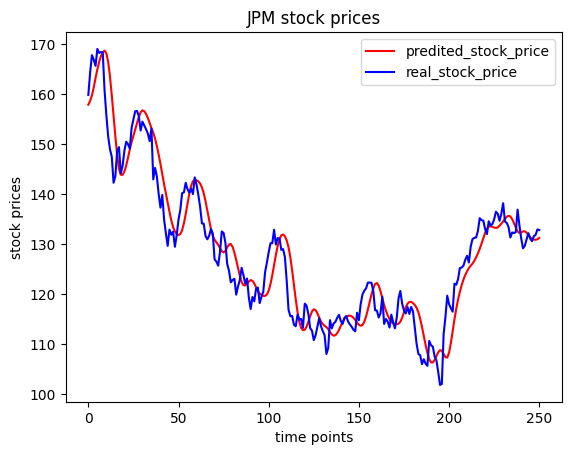

In [ ]:
plt.plot(predicted_stock_price,color="red",label="predited_stock_price")
plt.plot(test,color="blue",label="real_stock_price")
plt.xticks(np.arange(0,251,50))
plt.title("JPM stock prices")
plt.xlabel("time points")
plt.ylabel("stock prices")
plt.legend()
plt.show()

In [ ]:
error = np.sum(np.abs(test-predicted_stock_price))/250
y_ = np.max(test-predicted_stock_price) - np.min(test-predicted_stock_price)
print((error**0.5)/y_)

0.07030841481672917
